### Different Scenarios

Run imports:

In [ ]:
import visualizer
import benchmark
from path_planner import Objectives
from roads import load_road
from visualizer import plot_states_or_inputs
%matplotlib notebook
%matplotlib inline
#
road = load_road(benchmark.config.Road.ElchTest_One.value)
print(road.segments)
#
# for i in range(10):
#     print(road.get_tangent_angle_at(i * road.length/10))
    # print(road.get_global_position(i * road.length/10, 0))

#### Benchmarks

Progress: [████████████████████████████████████████████████████████████-] 99.88%  of the Road Complete (Segment 4), planned next 44.44ms in 0.47ms           
cannot drive further, final state:
 State: (s: 60.93), (n: 0.35), (xi: 0.01), (v: 20.00), (delta: -0.02)



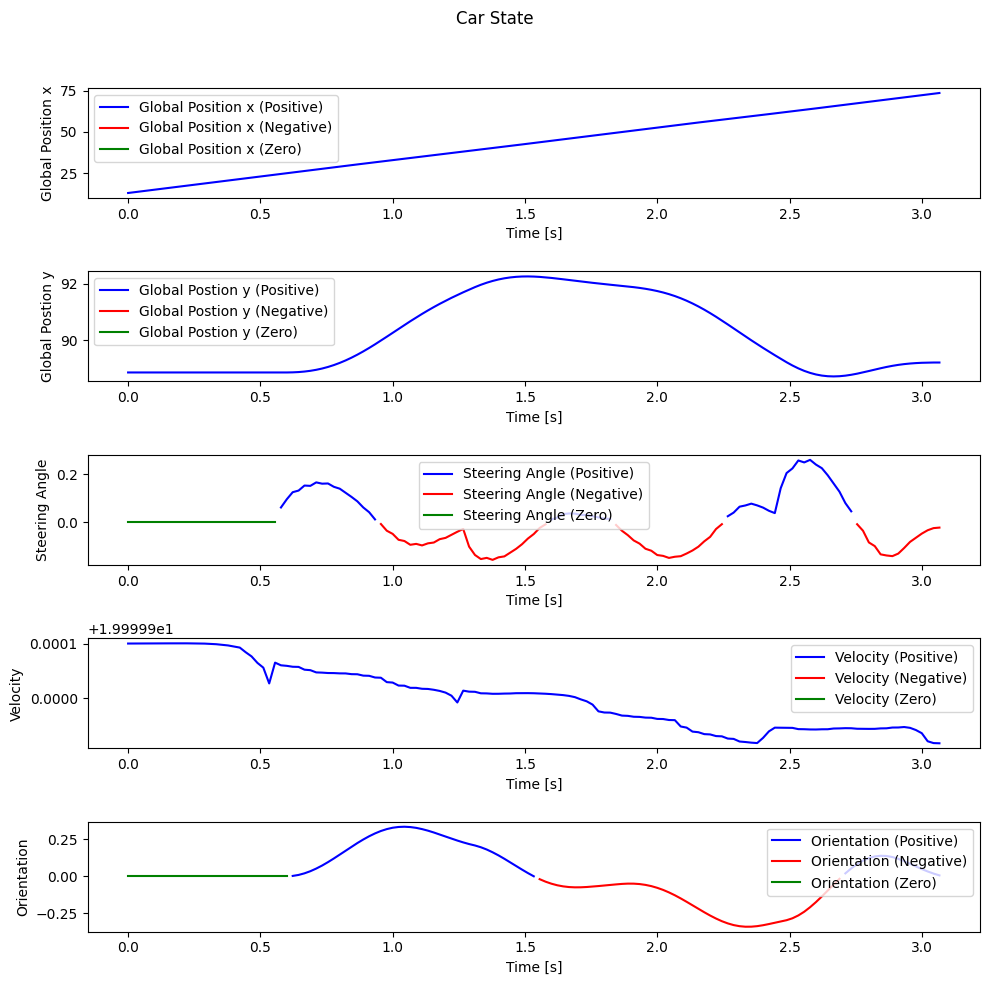

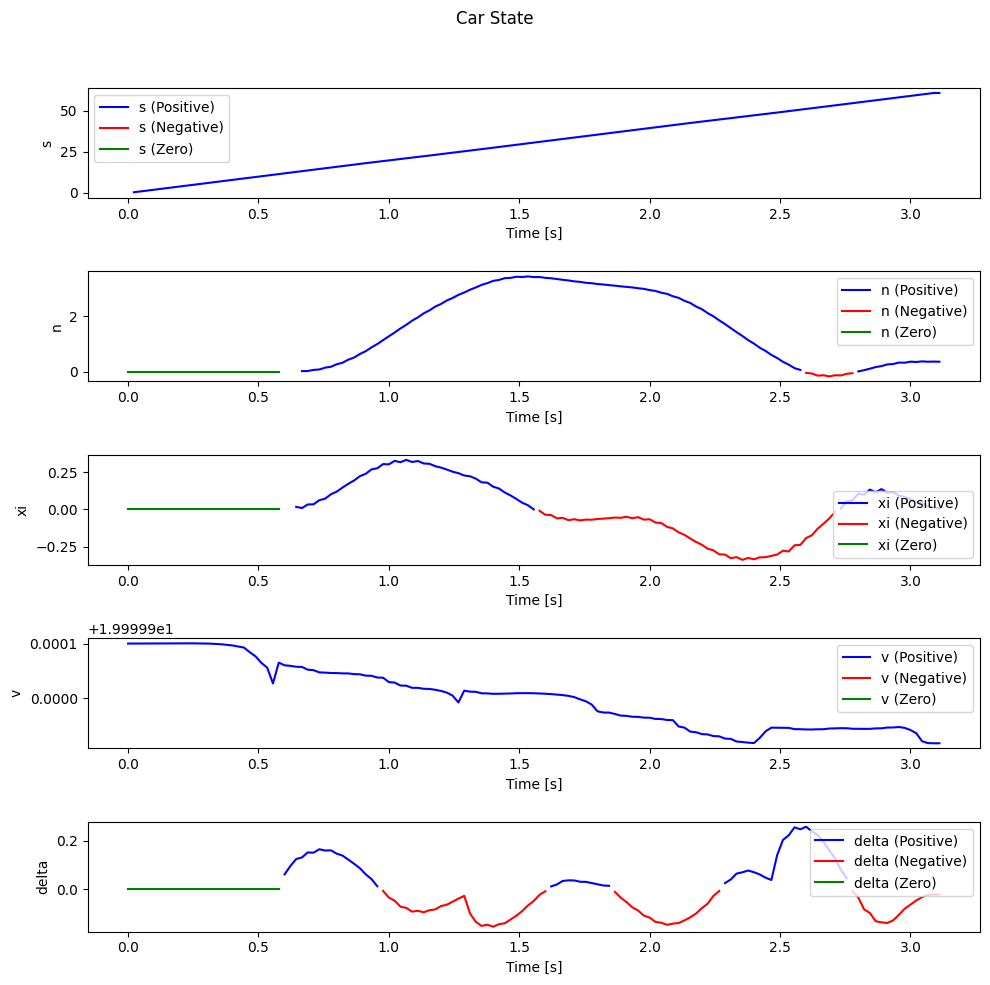

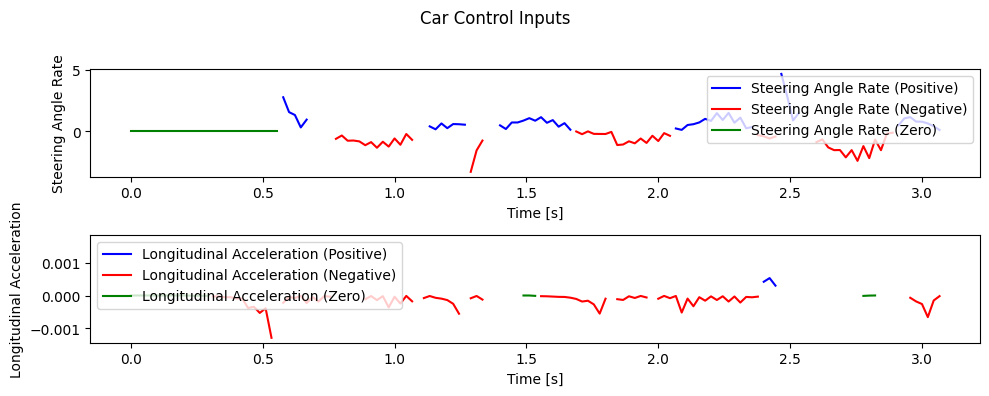

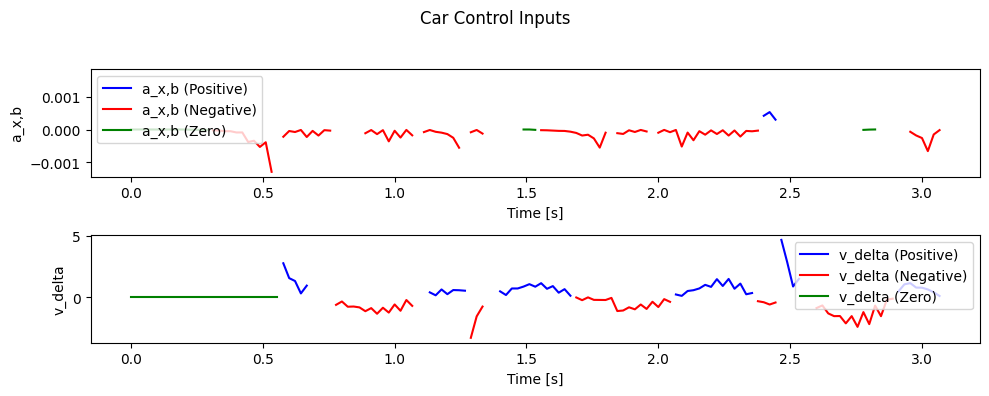

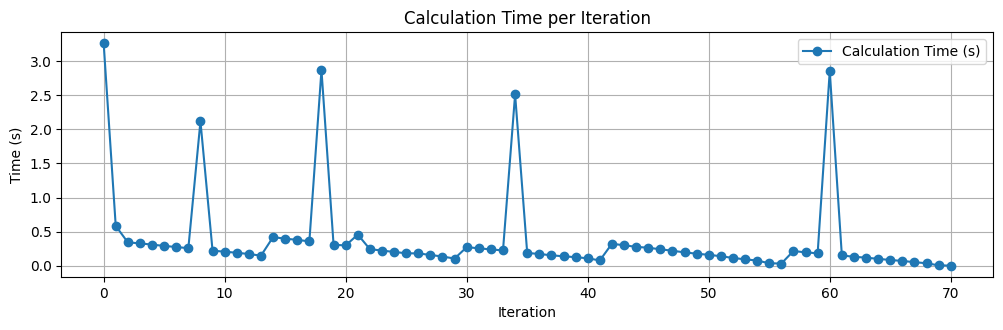

In [5]:
import benchmark
from path_planner import Objectives
%matplotlib notebook
%matplotlib inline

cfg = benchmark.config
benchmarks = benchmark.run(
    benchmark.BenchmarkConfiguration(
        start_velocity=cfg.Velocity.VeryFast,
        start_offset=cfg.LateralOffset.Mid,
        velocity_range=cfg.VelocityRange.Tight,
        road=cfg.Road.ElchTest_One,
        time_horizon=cfg.TimeHoriozon.Medium,
            time_discretization=1/45,
        models=[
            # (cfg.Model.RoadAlignedModel, cfg.SolverType.Convex),
            # (cfg.Model.RoadAlignedModel, cfg.SolverType.NonConvex),
            (cfg.Model.OrientedRoadFollowingModel, cfg.SolverType.Convex),
            # (cfg.Model.OrientedRoadFollowingModel, cfg.SolverType.NonConvex)
        ],
        objective=Objectives.minimize_velocity_deviation,
    )
)

for benchmark in benchmarks:
    # benchmark.car.predictive_model.plot_additional_information([], [])
    display(benchmark.animation)
    benchmark.plot_car_states()
    benchmark.plot_predictive_car_states()
    benchmark.plot_controls()
    benchmark.plot_predictive_controls()
    benchmark.car.plot_metrics()
    # scenario.plot_controls()
    # print(scenario.model.road.length)
    # print(scenario.actual_car_states[-1])

# 's', 'n', 'xi', 'v', 'delta'

#### Small-Angle-Approximation

In [ ]:
import numpy as np
visualizer.plot_with_bounds(
    y_labels=['tan(x)', 'x'],
    y_values_list=[
        [np.tan(x), x]
        for x in np.linspace(-1, 1, 1000)
    ],
    x_values=np.linspace(-1, 1, 1000),
    no_bounds=True,
    y_label='tan approximation',
)

#### Visualize McCormick

In [ ]:
x_bounds=(-2, 3)
y_bounds=(4, 10)

visualizer.visualize_mccormick(x_bounds, y_bounds)
visualizer.visualize_mccormick_2d_interactive(x_bounds, y_bounds)